## Importing all the required libraries

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
tips = sns.load_dataset('tips')

## Let's look at the first few rows to understand the dataset

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## How many weekdays are present in this dataset

In [8]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [9]:
tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

## Let's take a look at the last 5 rows 

In [13]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## How many luch and dinners data are present in the dataset

In [22]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<AxesSubplot:>

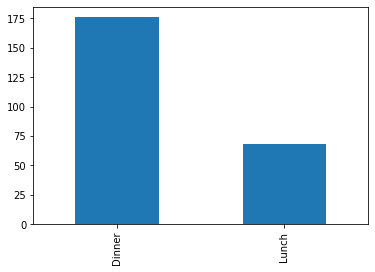

In [34]:
tips.time.value_counts().plot(kind = "bar")

In [23]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:>

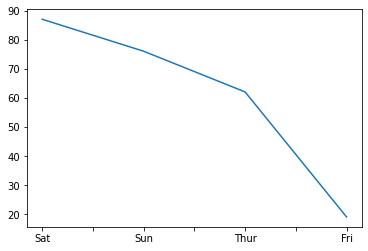

In [41]:
tips.day.value_counts().plot(kind = "line")

In [24]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

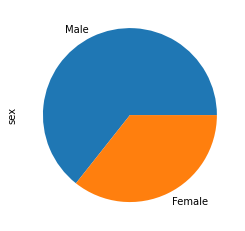

In [36]:
tips.sex.value_counts().plot(kind = "pie")

In [26]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

## What is the proportion of the dinner and lunches in %

In [42]:
tips.time.value_counts(normalize = True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

## When do people pay more tips - during lunch or dinner?

In [43]:
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

<AxesSubplot:xlabel='time'>

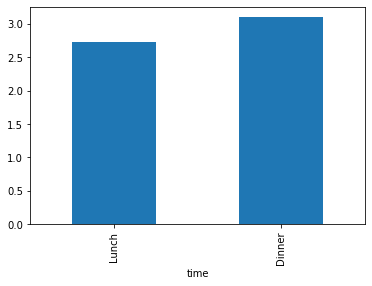

In [44]:
tips.groupby(['time'])['tip'].mean().plot.bar()

## Is it men or women who pay more tips?

In [52]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<AxesSubplot:xlabel='sex'>

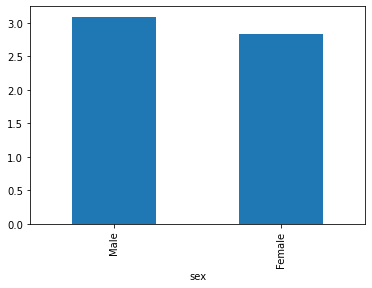

In [45]:
tips.groupby(['sex'])['tip'].mean().plot.bar()

## On which day is the highest tips paid?

In [51]:
tips.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

<AxesSubplot:xlabel='day'>

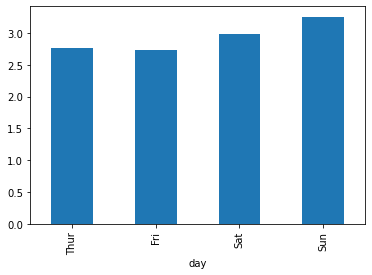

In [46]:
tips.groupby(['day'])['tip'].mean().plot.bar()

## Is it the smokers or the non-smokers who pay more tips?

In [54]:
tips.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

<AxesSubplot:xlabel='smoker'>

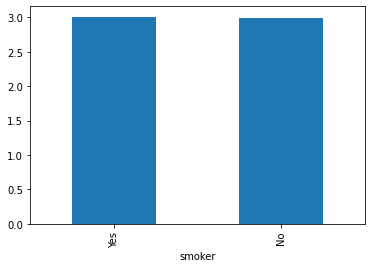

In [47]:
tips.groupby(['smoker'])['tip'].mean().plot.bar()

## Let's create a cross table for Smoker and Tips for average tips 

In [55]:
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

## Let's put it more like a pivot structure

In [56]:
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


## Cross table for smoker and day for average tips

In [61]:
tips.groupby(['smoker','day'])['tip'].mean()

smoker  day 
Yes     Thur    3.030000
        Fri     2.714000
        Sat     2.875476
        Sun     3.516842
No      Thur    2.673778
        Fri     2.812500
        Sat     3.102889
        Sun     3.167895
Name: tip, dtype: float64

## View in a Pivot structure

In [62]:
tips.groupby(['smoker','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
smoker,,,,
Yes,3.030000,2.7140,2.875476,3.516842
No,2.673778,2.8125,3.102889,3.167895


## Cross table for size and day for average tips

In [58]:
tips.groupby(['size','day'])['tip'].mean()

size  day 
1     Thur    1.830000
      Fri     1.920000
      Sat     1.000000
      Sun          NaN
2     Thur    2.442500
      Fri     2.644375
      Sat     2.517547
      Sun     2.816923
3     Thur    2.692500
      Fri     3.000000
      Sat     3.797778
      Sun     3.120667
4     Thur    4.218000
      Fri     4.730000
      Sat     4.123846
      Sun     4.087778
5     Thur    5.000000
      Fri          NaN
      Sat     3.000000
      Sun     4.046667
6     Thur    5.300000
      Fri          NaN
      Sat          NaN
      Sun     5.000000
Name: tip, dtype: float64

## View in a Pivot structure

In [88]:
tips.groupby(['size','day'])['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
size,,,,
1,1.8300,1.920000,1.000000,NaN
2,2.4425,2.644375,2.517547,2.816923
3,2.6925,3.000000,3.797778,3.120667
4,4.2180,4.730000,4.123846,4.087778
5,5.0000,NaN,3.000000,4.046667
6,5.3000,NaN,NaN,5.000000


## Cross table for size and smoker for average tips

In [66]:
tips.groupby(['smoker','size'])['tip'].mean()

smoker  size
Yes     1       1.460000
        2       2.709545
        3       4.095000
        4       3.992727
        5       2.500000
        6            NaN
No      1       1.415000
        2       2.489000
        3       3.069231
        4       4.195769
        5       5.046667
        6       5.225000
Name: tip, dtype: float64

## View in a Pivot structure

In [65]:
tips.groupby(['smoker','size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
smoker,,,,,,
Yes,1.460,2.709545,4.095000,3.992727,2.500000,NaN
No,1.415,2.489000,3.069231,4.195769,5.046667,5.225


## Adding a new column  

In [68]:
tips['tips_pct'] = tips.tip/tips.total_bill

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


# Visualize the relationship between tips and total bill

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

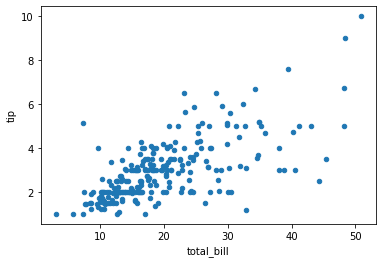

In [70]:
tips.plot.scatter(x = 'total_bill', y = 'tip')

# Visualize the relationship between tips and total bill using sns library

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

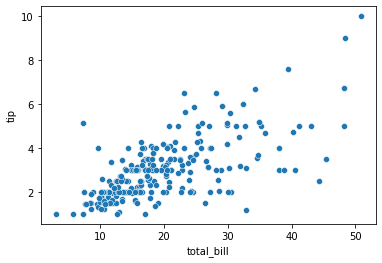

In [75]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

# Let's understand the effect of gender to understand the data better

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

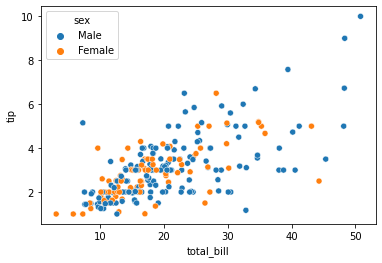

In [76]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

# Let's understand the effect of time(lunch/dinner) on the dataset

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

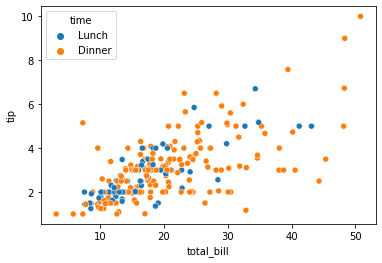

In [77]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'time')

# Creating the bifurcation of time on the chart above based on the column sex

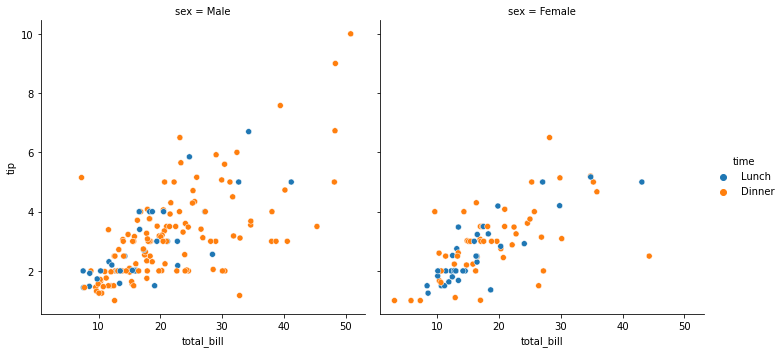

In [78]:
sns.relplot(x='total_bill',y='tip',data=tips,col='sex',hue='time')

# Let's look at the distribution of total bill by time

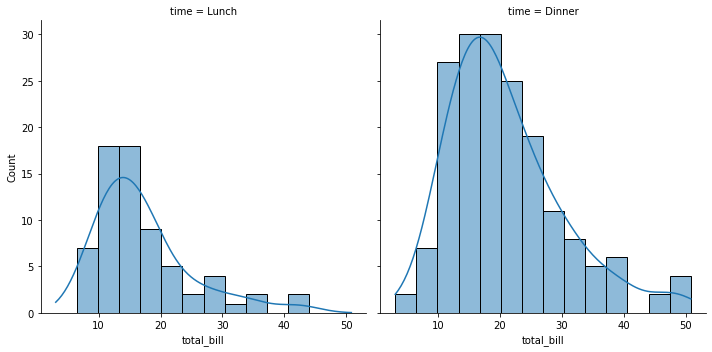

In [81]:
sns.displot(data=tips,x='total_bill',col='time',kde=True)

# Let's look at the distribution of tips by time

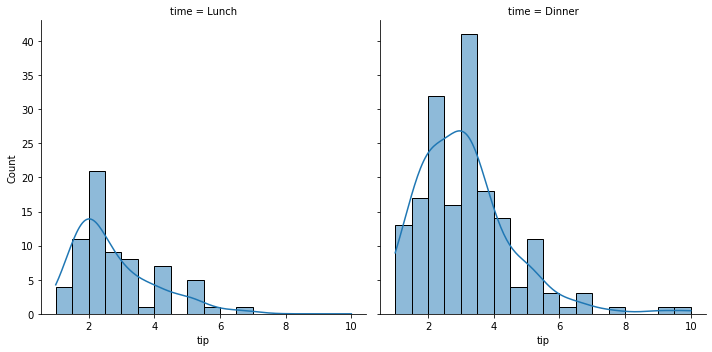

In [82]:
sns.displot(data=tips,x='tip',col='time',kde=True)

# Creating a correlation and distribution for all the numerical variables by sex

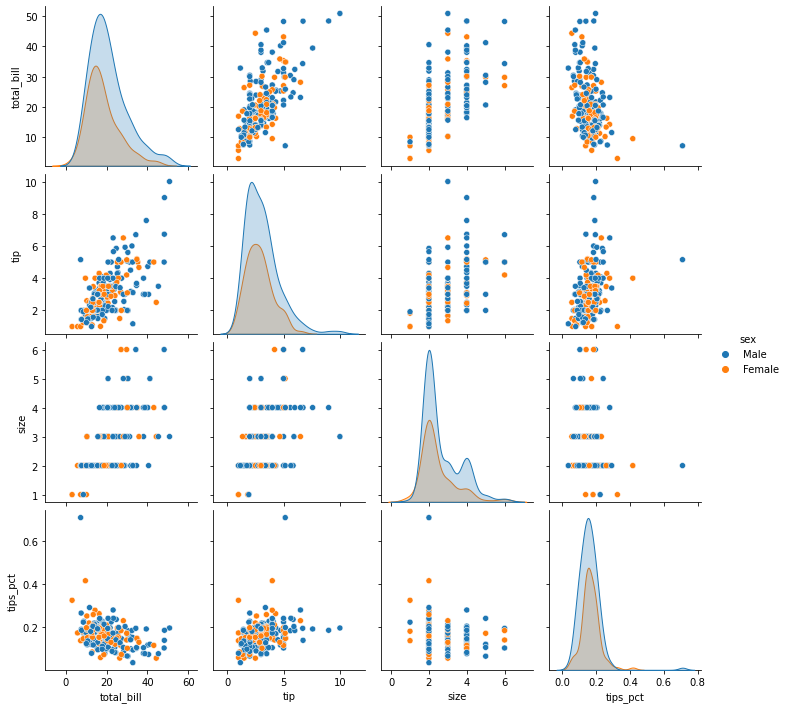

In [87]:
sns.pairplot(data=tips,hue='sex')